<a href="https://colab.research.google.com/github/Pongaaa/ComputerVision/blob/main/baitap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, optimizers

In [ ]:
# Hàm load ảnh
def load_images_from_folder(folder, img_rows, img_cols):
    images, labels = [], []
    class_names = sorted(os.listdir(folder))

    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (img_rows, img_cols))
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels), class_names


In [ ]:
# Đường dẫn
train_folder = '/content/drive/My Drive/HoaVietNam/train'
test_folder = '/content/drive/My Drive/HoaVietNam/test'

# Load ảnh
img_rows, img_cols = 128, 128
all_train_images, all_train_labels, class_names = load_images_from_folder(train_folder, img_rows, img_cols)
test_images, test_labels, _ = load_images_from_folder(test_folder, img_rows, img_cols)

# Tách training và validation theo tỉ lệ 7:3
train_images, val_images, train_labels, val_labels = train_test_split(
    all_train_images, all_train_labels, test_size=0.3, stratify=all_train_labels, random_state=42)


In [ ]:
# Tiền xử lý
train_images = train_images.astype("float32") / 255
val_images = val_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Mô hình LeNet-5
model = models.Sequential([
    layers.Conv2D(6, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 lớp
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Huấn luyện
history = model.fit(train_images, train_labels,
                    epochs=15,
                    batch_size=8,
                    validation_data=(val_images, val_labels),
                    shuffle=True)

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.2675 - loss: 1.5690 - val_accuracy: 0.2444 - val_loss: 1.5674
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.4642 - loss: 1.4560 - val_accuracy: 0.2000 - val_loss: 1.5339
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.5776 - loss: 1.3918 - val_accuracy: 0.4222 - val_loss: 1.4867
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.7900 - loss: 1.3312 - val_accuracy: 0.3778 - val_loss: 1.4432
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.7252 - loss: 1.2826 - val_accuracy: 0.4000 - val_loss: 1.4022
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7698 - loss: 1.2039 - val_accuracy: 0.4222 - val_loss: 1.3657
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.7784 - loss: 1.1507 - val_accuracy: 0.4889 - val_loss: 1.3331
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 0.7929 - loss: 1.1142 - val_accuracy: 0.4

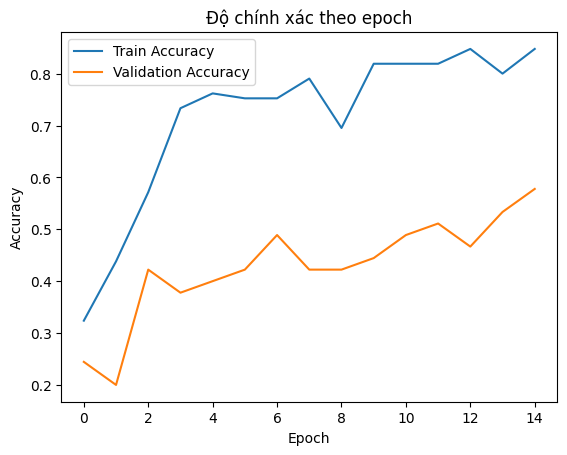

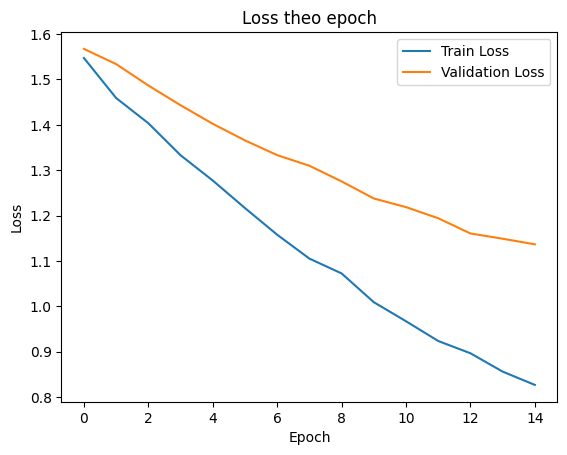

In [ ]:
# Vẽ biểu đồ
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Độ chính xác theo epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss theo epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Đánh giá trên tập test
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

print("Classification Report trên tập Test:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Classification Report trên tập Test:
              precision    recall  f1-score   support

         Cuc       0.67      0.80      0.73        10
         Dao       0.50      1.00      0.67        10
         Lan       0.00      0.00      0.00        10
         Mai       0.73      0.80      0.76        10
         Tho       0.86      0.60      0.71        10

    accuracy                           0.64        50
   macro avg       0.55      0.64      0.57        50
weighted avg       0.55      0.64      0.57        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
